<a href="https://colab.research.google.com/github/withjungjh/My-Neuromatch-Academy/blob/Python-tutorial/02_%EC%A0%95%EC%A7%84%ED%99%98_LIFtutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

print(t_max, dt, tau, el, vr, vth, r, i_mean)

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


# Section1: Histograms

$$ N = \sum_{j=1}^{J} m_j $$
$m_j$ : a function counting the number of samples $V(t_k)$ that fall into bin $j$

```
plt.hist(data, bins, label='my data')
plt.legend()
plt.show()
```
`plt.hist` : plot `data` in `bins` bins.

`label`

```
pdf, bins, patches = plt.hist(data, bins)
```
`plt.hist` returns
 
- `pdf`: histogram bins
- `bins`: the edges of the bins
- `patches`: the individual patches

## Exercise 1

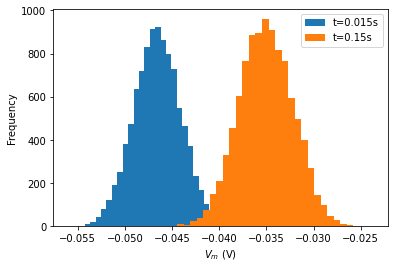

In [ ]:
# exercise1
np.random.seed(2020) #set random number generator

t_range = np.arange(0, t_max, dt) # np.arange(start, stop, step)
step_end = len(t_range)
n = 10000
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**0.5 * (2 * np.random.random([n, step_end])-1))
nbins = 32

# look over time steps
for step, t in enumerate(t_range):
  # skip first iteration
  if step == 0: 
    continue
  # compute v_n
  v_n[:, step] = v_n[:, step - 1] + (dt/tau) * (el - v_n[:, step - 1] + r * i[:, step])

plt.figure()
plt.ylabel("Frequency")
plt.xlabel("$V_m$ (V)")

plt.hist(v_n[:, int(step_end/10)], nbins, label="t=" + str(t_max/10)+"s", histtype="stepfilled", linewidth=0)

plt.hist(v_n[:, -1], nbins, label="t=" + str(t_max)+"s", histtype="stepfilled", linewidth=0)

plt.legend()
plt.show()

# Section2: Dictionaries & introducing spikes


In [ ]:
mydict = {1: "L", "grade": 100}
print(mydict)

{1: 'L', 'grade': 100}


In [ ]:
print(mydict["grade"]) #Key -> value

100


In [ ]:
print(mydict.keys())

dict_keys([1, 'grade'])


In [ ]:
print(mydict.values())

dict_values(['L', 100])


In [ ]:
a = list(mydict.keys())

In [ ]:
print(a)

[1, 'grade']


In [ ]:
for item in mydict:
  print(item, mydict[item])

1 L
grade 100


In [ ]:
mydict = {x: x**2 for x in range(1, 4)}

In [ ]:
for item in mydict:
  print(item, mydict[item])

1 1
2 4
3 9


In [ ]:
 #insertion order
mydict = {9: "L", 1: "A"}
for item in mydict:
  print(item, mydict[item])

9 L
1 A


If $V(t) < V_{th}$ (Graded potential)
$$\tau_m \frac{d}{dt}V(t) = E_L - V(t) + RI(t)$$
Else
$$V(t) = V_r$$ 
(reset membrane potential to resting membrane potential)

record spike at time t (action potential)








## Exercise 2
```
plt.scatter(x, y, color="k', marker=".")
```
- `plt.plot` for line
- `plt.scatter` for scatter
- `plt.hist` for histogram

__raster plot__ : plot multiple neurons spike with dots, `j` means the index of a neuron.

```
plt.scatter(spike_times, j*np.ones_like(spike_times))
```

- `plt.subplot` : for multiple plots in the same figure with shared x axis and y axis through parameter `sharex`, `sharey`

- `plt.tight_layout()`: adding this at the end of subplot adjust subplot parameter automatically.

```
plt. figure()

ax1 = plt.subplot(1, 2, 1)
plt.plot(t_range, my_data_left)
plt.ylabel("ylabel")

plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(t_range, my_data_right)

plt.tight_layout()
plt.show()
```

`plt.subplot(nrow, ncol, site(?))`

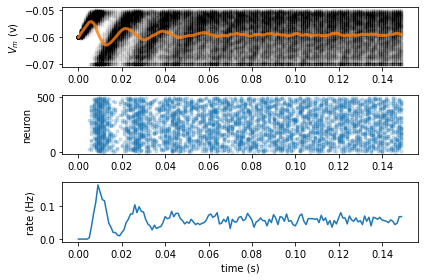

In [15]:
np. random.seed(2020)

t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**0.5 * (2 * np.random.random([n, step_end]) - 1))

spikes = {j: [] for j in range(n)}
spikes_n = np.zeros([step_end])

for step, t in enumerate(t_range):
  if step == 0:
    continue

  v_n[:, step] = v_n[:, step - 1] + (dt/tau) * (el - v_n[:, step - 1] + r* i[:, step])

  for j in range(n):
    if v_n[j, step] >= vth:
      v_n[j, step] = vr #reset voltage
      # record spike at time t
      spikes[j] += [t] # add this spike time
      spikes_n[step] += 1 # add spike count to this step

v_mean = np.mean(v_n, axis=0) 
# 매번 axis는 헷갈리지만 결과에서 어떤 축의 dimension을 남기느냐로 생각한 후에 
# 0:row ; 1:column ; 2:depth
# 이렇게 이해하면 되지 않을까?
# 예를 들어 3 x 2 x 5 에서 axis=0이면 결과물은 dim = 3으로 axis=2는 dim= 2로 말이다.
# 결과적으로 그냥 shape을 알고 어떤 방식으로 계산하고 싶은지 명확하게 하면 덜 헷갈릴 것 같다. 
# 종이에 적어서 데이터의 구성을 정확하게 이해하자. 
spikes_mean = spikes_n / n

plt.figure()

ax1 = plt.subplot(3, 1, 1) #3 by 1 array
for j in range(n):
  plt.scatter(t_range, v_n[j], color = "k", marker=".", alpha=0.01)
plt.plot(t_range, v_mean, "C1", alpha=0.8, linewidth=3)
plt.ylabel("$V_m$ (v)")

plt.subplot(3, 1, 2, sharex=ax1) # 가로축 공유

#***
for j in range(n):
  times = np.array(spikes[j]) 
  plt.scatter(times, j * np.ones_like(times), color="C0", marker=".", alpha=0.2)
  # np.ones_like(array_like) : array_like data와 같은 모양의 1로 가득찬 ndarray를 return한다 
#***

plt.ylabel("neuron")

plt.subplot(3,1,3, sharex = ax1)
plt.plot(t_range, spikes_mean)
plt.xlabel("time (s)")
plt.ylabel("rate (Hz)")

plt.tight_layout()







In [17]:
print(type(spikes_n), type(spikes_mean))
print(spikes_n)
print(spikes_mean)
print(len(spikes_n))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[ 0.  0.  0.  0.  0.  2. 19. 39. 56. 82. 71. 60. 58. 41. 24. 18. 10. 10.
  6.  5. 10. 14. 25. 30. 38. 38. 52. 40. 49. 42. 41. 30. 23. 20. 14. 21.
 16. 18. 19. 25. 34. 31. 32. 42. 34. 39. 39. 31. 28. 23. 26. 24. 30. 26.
 22. 24. 22. 24. 25. 29. 36. 38. 33. 35. 40. 23. 24. 30. 26. 34. 16. 30.
 26. 26. 33. 34. 28. 30. 39. 34. 29. 18. 26. 28. 32. 28. 28. 20. 30. 25.
 37. 32. 22. 34. 33. 27. 38. 27. 28. 22. 20. 26. 35. 38. 27. 22. 31. 31.
 31. 30. 31. 25. 36. 28. 32. 22. 28. 18. 28. 23. 32. 40. 32. 32. 23. 35.
 29. 27. 32. 26. 28. 22. 35. 27. 33. 20. 33. 32. 30. 33. 29. 28. 27. 25.
 29. 27. 22. 24. 34. 34.]
[0.    0.    0.    0.    0.    0.004 0.038 0.078 0.112 0.164 0.142 0.12
 0.116 0.082 0.048 0.036 0.02  0.02  0.012 0.01  0.02  0.028 0.05  0.06
 0.076 0.076 0.104 0.08  0.098 0.084 0.082 0.06  0.046 0.04  0.028 0.042
 0.032 0.036 0.038 0.05  0.068 0.062 0.064 0.084 0.068 0.078 0.078 0.062
 0.056 0.046 0.052 0.048 0.06  0.052 0.044 0.048 0.0

```
for j in range(n):
  times = np.array(spikes[j]) 
  plt.scatter(times, j * np.ones_like(times), color="C0", marker=".", alpha=0.2)
```
이 부분이 어려웠다. 이해가 잘 되지 않는다. 

따라서 치는 게 상당히 뭐랄까 머리속으로 잘 들어오지 않는 이유는 내가 이걸 어떻게 생각해서 칠까하는 불확실함이 있기 때문에 그런 것 같다. 있는 걸 이해하는 건 충분히 할 수 있는데, 내가 이걸 생각해 낼 수 있을까 하는 불안감이 있다. 코드를 안 보고 한 번 쳐보면서 내가 스스로 모델을 구성하는 과정을 되짚어 보는 것도 해보아야 할 것 같다. 

# Section 3: Boolean indeces


In [ ]:
a = np.array([1,2,3])
b = a >=2
print(b)

[False  True  True]


In [ ]:
print(a[b])

[2 3]


In [ ]:
print(a[a>=2]) # like filter

[2 3]


## broadcasting
ndarray에서 "+" 연산은 함께 다른 argument의 모든 element에 적용된다. 
이를 확장하면 2x1 3x1 를 더하면 2x3의 ndarray가 나오는 것으로 이해할 수 있다.

## Exercise 3
boolean indexing을 통해 loop를 피할 수 있다.

```
v_rest = (v_n[:, step] == vr)
print(v_n[v_rest, step])

>>> [vr, ..., vr]
```
- `np.where` : `True`값을 가지는 index를 return 한다
- `plot_all`

In [22]:
def plot_all(t_range, v, raster_on=True, raster=None, spikes=None, spikes_mean=None):
  '''
  plot time evolution for
  (1) multiple realizations of membrane potential
  (2) spikes
  (3) mean spike rate (optional)

  Args: 
    # args name (data type)
        args explain (data shape; dim of row / nrow, ncol)

    t_range (numpy array of floats)
        range of time steps for the plots of shape (time steps)

    v (numpy array of floats)
        membrane potential values of shape (neuorns, time steps)

    raster (numpy array of floats)
        spike raster of shape (neurons, time steps)

    spikes (dictionary of lists)
        list with spike times indexed by neuron number

    spikes_mean (numpy array of floats)
        Mean spike rate for spikes as dictionary

  Returns:
    Nothing.
  '''
  v_mean = np.mean(v, axis=0)


  plt.figure()
  if raster is None:
    ax1 = plt.subplot(3, 1, 1)
    for j in range(n):
      plt.scatter(t_range, v[j], color = "k", marker=".", alpha=0.01)
    plt.plot(t_range, v_mean, "C1", alpha=0.8, linewidth=3)
    plt.ylabel("$V_m$ (v)")

    plt.subplot(3, 1, 2, sharex=ax1) 

  
    plt.imshow(raster, cmap="Greys", origin="lower", aspect='auto')

    for j in range(n):
      times = np.array(spikes[j]) 
      plt.scatter(times, j * np.ones_like(times), color="C0", marker=".", alpha=0.2)
    
  
    plt.ylabel("neuron")
    plt.subplot(3,1,3, sharex = ax1)
    plt.plot(t_range, spikes_mean)
    plt.xlabel("time (s)")
    plt.ylabel("rate (Hz)")

  else:
    ax1 = plt.subplot(3, 1, 1)
    for j in range(n):
      plt.scatter(t_range, v[j], color = "k", marker=".", alpha=0.01)
    plt.plot(t_range, v_mean, "C1", alpha=0.8, linewidth=3)
    plt.ylabel("$V_m$ (v)")

    plt.subplot(3, 1, 2) 
    plt.imshow(raster, cmap="Greys", origin="lower", aspect='auto')
    plt.ylabel("neuron")
    plt.subplot(3,1,3, sharex = ax1)

    raster_mean = np.mean(raster, axis=0)
    plt.plot(t_range, raster_mean)
    plt.xlabel("time (s)")
    plt.ylabel("rate (Hz)")

  plt.tight_layout()

# raster_on = False 일때 error 발생..

In [37]:
print(v_n.shape)
print(raster.shape)


(500, 150)
(500, 150)


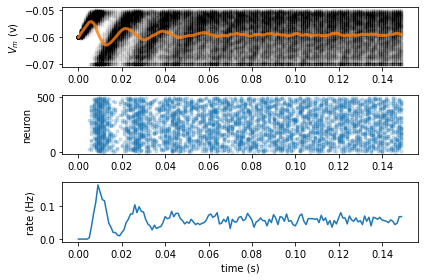

In [11]:
np.random.seed(2020)

t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**0.5 * (2 * np.random.random([n, step_end]) - 1))

spikes = {j : [] for j in range(n)}
spikes_n = np.zeros([step_end])

for step, t in enumerate(t_range):
  if step == 0:
    continue

  v_n[:, step] = v_n[:, step - 1] + (dt/tau) * (el - v_n[:, step - 1] + r*i[:, step])

  spiked = (v_n[:, step] >= vth)

  v_n[spiked, step] = vr

  for j in np.where(spiked)[0]: # 여기서부터 아래 세 줄 무슨 뜻인지 모르겠음
    spikes[j] += [t]
    spikes_n[step] +=1


spikes_mean = spikes_n / n

plot_all(t_range, v_n, raster_on = False, spikes = spikes, spikes_mean=spikes_mean)


neuron plot이 왜 안나올까?
`spikes`를 `spiked`로 잘 못 씀

## Exercise 4: Making a binary raster plot

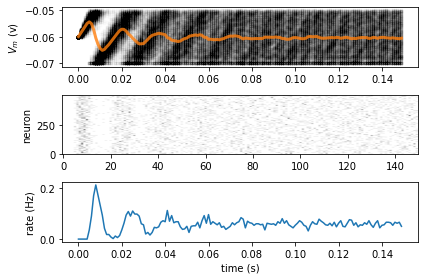

In [24]:
np.random.seed(2020) 

t_range = np.arange(0,t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max/dt)** 0.5 * (2 * np.random.random([n, step_end]) - 1))
raster = np.zeros([n,step_end])

for step, t in enumerate(t_range):
  if step == 0:
    continue
  
  v_n[:, step] = v_n[:, step - 1] + (dt/tau) * (el - v_n[:, step] + r* i[:, step])
  
  spiked = (v_n[:, step] >= vth)

  v_n[spiked, step] = vr

  raster[spiked, step] = 1.

#plot_all_raster(t_range, v_n, raster=raster)
plot_all(t_range, v_n, raster=raster)


# Section 4: refractory period
## Exercise 5: investigating refactory periods


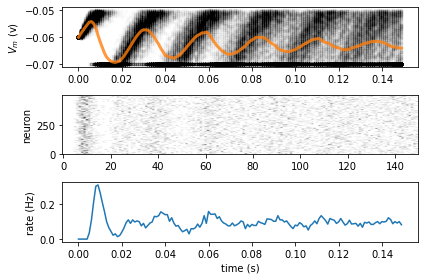

In [39]:
np.random.seed(2020)

t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])

#Initialize t_ref and last_spike
t_ref = 0.01
last_spike = -t_ref * np.ones([n])

# Loop over time steps
for step, t in enumerate(t_range):
  if step == 0:
    continue
  v_n[:, step] = v_n[:, step - 1] + (dt/tau) * (el - v_n[:, step - 1] + r*i[:, step])
  spiked = (v_n[:, step] >= vth)
  v_n[spiked, step] = vr
  raster[spiked, step] = 1.

  spiked

  clamped = (last_spike + t_ref > t) 
  v_n[clamped,step] = vr # reset clamped neuron to vr using clamped
  last_spike[spiked] = t

plot_all(t_range, v_n, raster = raster)

# Section 5: Using functions

- 동일한 코드를 반복해서 써주는 것을 간단하게 만들어주는 역할


In [63]:
def mysum(a, b):
  '''
  Return a + b
  '''
  return a + b

print(mysum(1, 2))


3


In [64]:
help(mysum)

Help on function mysum in module __main__:

mysum(a, b)
    Return a + b



In [65]:
# mandatory argument
def mysum(a, b=2):
  '''
  Return a + 2 or a + b
  '''
  return a + b

print(mysum(1))

3


In [66]:
def mysum(a, b=None):
  if b is None:
    b = 2
  return a + b

print(mysum(1))

3


In [3]:
def mysumprod(a, b):
  return a+b, a*b

my_sum, my_prod = mysumprod(2, 3)
print(my_sum, my_prod)



5 6


In [5]:
def mysum(a, b):
  c = a*b
print(mysum(1, 2))

None


## Exercise 6





In [25]:
def ode_step(v, i, dt):
  '''
  Evolves membrane potential by one step of discrete time integration

  Args:
    v (numpy array of floats)
      membrane potential at previous time step of shape (neuons)
    
    i (numpy array of floats)
      synaptic input at current time step of shape (neuorns)

    dt (float)
      time step increment
  Returns:
    v (numpy array of floats)
      membrane potential at current time step of shape (neurons)
  '''
  v = v + dt/tau * (el - v + r*i)

  return v

def spike_clamp(v, delta_spike):
  '''
  Restes membrane potential of neurons if v >= vth
  and clamps ot vr if interval of time since last spike < t_ref

  Args:
    v (numpy array of floats)
      membrane potential of shape (neurons)

    delta_spike (numpy array of floats)
      interval of time since last spike of shape (neurons)

  Returns:
    v (numpy array of floats)
      membrane potential of shape (neuron)
    spiked (numpy array of floats)
      boolean array of neurons that spiked of shape (neurons)
  '''
  spiked = v >= vth
  v[spiked] = vr

  clamped = delta_spike < t_ref
  v[clamped] = vr

  return v, spiked


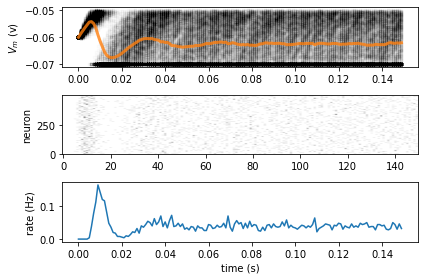

In [26]:
np.random.seed(2020)

t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**0.5 * (2 * np.random.random([n, step_end])-1))

raster = np.zeros([n, step_end])

mu = 0.01
sigma = 0.007
t_ref = mu + sigma*np.random.normal(size=n)
t_ref[t_ref<0] = 0
last_spike = -t_ref * np.ones([n])

for step, t in enumerate(t_range):
  if step == 0:
    continue
  v_n[:, step] = ode_step(v_n[:, step-1], i[:, step], dt)
  v_n[:, step], spiked = spike_clamp(v_n[:, step], t - last_spike)

  raster[spiked, step] = 1.
  last_spike[spiked] = t

plot_all(t_range, v_n, raster=raster)


# Section 6: Using classes
## Module

In [5]:
from google.colab import drive
drive.mount('/content/drive')

!cp /content/drive/MyDrive/Colab_Notebooks/Neuromatch/mymath.py /content

In [6]:
import mymath

In [7]:
print(mymath.mysum(1, 2))


3


In [8]:
import mymath as mm

print(mm.mysum(1,2))

3


In [9]:
from mymath import mysum
print(mysum(1,2))

3


In [10]:
from mymath import *
print(mysum(1,2))

3


*는 피해야 한다. 공통의 function을 가지고 있는 두 모듈을 import하면 에러가 생길 수도 있다. 

In [ ]:
# In-place operations(+ - * / % ** //)

## Classes

In [11]:
class NMANeuron():
  def __init__(self, spikes=0): # self: the variables and functions inside the class
    self.spikes = spikes # <- attribute: variables internel to the class
  def spike(self): #<- method: functions internal to the class
    self.spikes += 1

In [12]:
my_neuron = NMANeuron()
print(my_neuron.spikes)# <- attribute

0


In [13]:
my_neuron.spike() #<- method
print(my_neuron.spikes)

1


## Exercise 7: Making a LIF class
Goal: making a class satisfying following conditions

- `LIFNeuron`: class name

- several attributes
```
self.v             current membrane potential
self.spiked        neurons that spiked
self.last_spike    last spike time of each neuron
self.t             running time of the simulation
self.steps         simulation step
```
- a single method
```
self.ode_step()    performs single step discrete time integration for provided synaptic current and dt
```

In [20]:
class LIFNeurons:
  '''
  Keeps track of membrane potential for multiple realization of LIF neuron, 
  and performs single step discret time integration.
  '''
  def __init__(self, n, t_ref_mu=0.01, t_ref_sig=0.002,
               tau=20e-3, el=-60e-3, vr=-70e-3, vth=-50e-3, r=100e6):
    # Neuron count
    self.n = n

    # Neuron parameters
    self.tau = tau
    self.el = el
    self.vr = vr
    self.vth = vth
    self.r = r

    # Initializes refractory period distribution
    self.t_ref_mu = t_ref_mu
    self.t_ref_sig = t_ref_sig
    self.t_ref = self.t_ref_mu + self.t_ref_sig * np.random.normal(size=self.n)
    self.t_ref[self.t_ref<0] = 0

    # State variables
    self.v = self.el * np.ones(self.n)
    self.spiked = self.v >= self.vth
    self.last_spike = -self.t_ref*np.ones([self.n])
    self.t = 0.
    self.steps = 0

  def ode_step(self, dt, i):

    # Update running time and steps
    self.t += dt
    self.steps += 1

    # One step of discret time integration of dt
    self.v = self.v + dt/self.tau * (self.el - self.v + self.r * i)

    # Spike and Clamp
    self.spiked = self.v >= self.vth
    self.v[self.spiked] = self.vr
    self.last_spike[self.spiked] = self.t
    clamped = self.t - self.last_spike < self.t_ref
    self.v[clamped] = self.vr  


Ran for 0.15s in 150 steps.


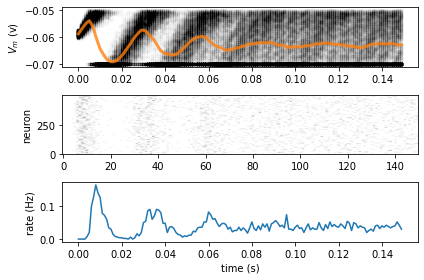

In [27]:
np.random.seed(2020)

t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**0.5 * (2*np.random.random([n, step_end]) - 1))
raster = np.zeros([n, step_end])

neurons = LIFNeurons(n)

for step, t in enumerate(t_range):
  neurons.ode_step(dt, i[:,step])

  v_n[:, step] = neurons.v
  raster[neurons.spiked, step] = 1.

print(f'Ran for {neurons.t:.3}s in {neurons.steps} steps.')

plot_all(t_range, v_n, raster=raster)

# Tuple

In [32]:
mytuple = (100, "L", 10, 1e4)
print(mytuple[1:])

('L', 10, 10000.0)


In [33]:
# Dictionary index
mydict = {('L', 1): 100, 
          ('Li', 5): 98} 
# in tuples as keys, parameters used in their simulation 
# a value is the result of each simulation.

for item in mydict:
  print(mydict[item])
  


100
98


# Set

In [34]:
myset = set([1, 1, 2, 3])
print(myset)

{1, 2, 3}


In [35]:
print(list(myset))


[1, 2, 3]


# Code expression
- __Explicit__ is better than implicit
  - show that it happens or write that it happens
- __Simple__ is better than complex
- __Readability__ counts
